# TASK 4 - ASSIGNMENT 2

* MRUTULA SURESH
* 28967828

### PACKAGES IMPORTED

    * Pandas
    * matplotlib
    * numpy
    * preprocessing from sklearn
    * sklearn
    * DBSCAN from sklearn.cluster
    * Counter from collections

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
from sklearn import preprocessing
import sklearn
from sklearn.linear_model import LinearRegression
from sklearn.cross_validation import train_test_split

C:\Users\mrutula1995\Anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [4]:
from sklearn.cluster import DBSCAN
from collections import Counter

In [5]:
# importing the dataframe

prop = pd.read_csv('dataset4_with_outliers.csv')
prop.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long
0,5437400630,20141016T000000,625000.0,4,2.25,1920,8259,2.0,0,0,4,8,1920,0,1979,0,98027,47.5616,-122.088
1,3999300290,20141016T000000,850000.0,3,3.50,2620,11148,2.0,0,4,4,9,2060,560,1977,0,98008,47.5845,-122.115
2,2525059134,20141016T000000,500000.0,2,1.50,1760,12000,1.0,0,0,4,7,1760,0,1964,0,98052,47.6288,-122.109
3,1862400285,20141016T000000,375000.0,3,1.00,1200,5404,1.0,0,0,3,6,1200,0,1937,0,98117,47.6969,-122.368
4,7199320190,20141016T000000,618000.0,4,2.25,2470,7350,1.0,0,0,3,7,1600,870,1978,0,98052,47.6936,-122.128


In [6]:
# to see the summary statistics of the dataframe
prop.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long
count,9.996000e+03,9.996000e+03,9996.000000,9996.000000,9996.000000,9.996000e+03,9996.000000,9996.000000,9996.000000,9996.000000,9996.000000,9996.000000,9996.000000,9996.000000,9996.000000,9996.000000,9996.000000,9996.000000
mean,4.598579e+09,4.980468e+05,3.356943,2.082558,2025.039916,1.547281e+04,1.487345,0.002401,0.194678,3.374250,7.593037,1750.824930,274.214986,1972.056423,68.046919,98078.460984,47.555261,-122.212583
std,2.880071e+09,2.540477e+05,0.937060,0.736420,854.963922,4.297506e+04,0.540751,0.048943,0.679519,0.623769,1.112505,793.994317,418.925228,28.847071,362.111900,53.448592,0.142261,0.140801
min,1.000102e+06,8.995000e+04,1.000000,0.500000,390.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,4.000000,390.000000,0.000000,1900.000000,0.000000,98001.000000,47.162200,-122.519000
25%,2.126049e+09,3.200000e+05,3.000000,1.500000,1400.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1180.000000,0.000000,1953.000000,0.000000,98033.000000,47.456775,-122.329000
50%,3.905060e+09,4.400000e+05,3.000000,2.250000,1870.000000,7.509500e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1530.000000,0.000000,1976.000000,0.000000,98065.000000,47.563500,-122.228000
75%,7.371500e+09,6.100000e+05,4.000000,2.500000,2480.000000,1.036150e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2160.000000,520.000000,1998.000000,0.000000,98118.000000,47.679900,-122.122000
max,9.900000e+09,2.700000e+06,20.000000,6.500000,7880.000000,1.164794e+06,3.500000,1.000000,4.000000,5.000000,13.000000,7880.000000,2610.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000


In [7]:
# to see the correlation of the variables

prop.corr()



,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long
id,1.000000,-0.009097,0.003085,-0.000628,-0.014713,-0.146646,0.023681,-0.004467,0.017886,-0.022657,0.007552,-0.010341,-0.010427,0.023282,-0.020583,-0.004965,-0.002842,0.014752
price,-0.009097,1.000000,0.322463,0.542735,0.719577,0.134640,0.297020,0.040854,0.302720,-0.008043,0.711380,0.625579,0.282882,0.130036,0.056560,-0.033390,0.370523,0.070152
bedrooms,0.003085,0.322463,1.000000,0.474310,0.555541,0.031983,0.155126,-0.014325,0.064011,0.025449,0.326311,0.448363,0.283988,0.152412,0.012249,-0.133996,-0.011715,0.126915
bathrooms,-0.000628,0.542735,0.474310,1.000000,0.738947,0.107096,0.502693,0.000052,0.154718,-0.146713,0.652534,0.666854,0.244184,0.554162,0.024537,-0.214465,0.001736,0.241135
sqft_living,-0.014713,0.719577,0.555541,0.738947,1.000000,0.194880,0.349545,0.012330,0.234978,-0.081808,0.749753,0.873474,0.385345,0.352420,0.021656,-0.201062,0.035915,0.266074
sqft_lot,-0.146646,0.134640,0.031983,0.107096,0.194880,1.000000,-0.005045,0.039178,0.093621,-0.010904,0.129833,0.201427,0.015952,0.056667,0.010463,-0.132849,-0.085409,0.251319
floors,0.023681,0.297020,0.155126,0.502693,0.349545,-0.005045,1.000000,-0.006412,0.012968,-0.272341,0.452949,0.519279,-0.270828,0.516152,-0.002684,-0.061779,0.038888,0.121152
waterfront,-0.004467,0.040854,-0.014325,0.000052,0.012330,0.039178,-0.006412,1.000000,0.253684,0.013168,0.005085,-0.000648,0.026393,-0.035528,0.080433,0.039276,-0.044910,-0.057769
view,0.017886,0.302720,0.064011,0.154718,0.234978,0.093621,0.012968,0.253684,1.000000,0.026604,0.200896,0.128313,0.236363,-0.043327,0.057207,0.079862,-0.004763,-0.064269
condition,-0.022657,-0.008043,0.025449,-0.146713,-0.081808,-0.010904,-0.272341,0.013168,0.026604,1.000000,-0.169918,-0.170738,0.156644,-0.343027,-0.058381,-0.013056,-0.047949,-0.086093


* ** From the correlation matrix i could see that the following are highly correlated to each other **
    * price
    * bedrooms
    * Bathrooms
    * sqft_living
    * grade
#### These columns are stored separately in a different dataframe and their values are standardised before passing it into the DBSCAN algorithm 

In [8]:
prop_out = prop[['price','bedrooms','bathrooms','sqft_living','grade']]

In [9]:
# the columns are standardised using StandardScaler() from sklearn
std_scale = preprocessing.StandardScaler().fit(prop_out[['price','bedrooms','bathrooms','sqft_living','grade']])
df_std = std_scale.transform(prop_out[['price','bedrooms','bathrooms','sqft_living','grade']])

In [10]:
df_standard = pd.DataFrame(df_std)
df_standard.columns = ['price','bedrooms','bathrooms','sqft_living','grade']
df_standard.head()

,price,bedrooms,bathrooms,sqft_living,grade
0,0.499747,0.686284,0.227384,-0.122865,0.365826
1,1.385452,-0.380937,1.924870,0.695924,1.264744
2,0.007689,-1.448157,-0.791107,-0.310017,-0.533092
3,-0.484369,-0.380937,-1.470102,-0.965048,-1.432009
4,0.472192,0.686284,0.227384,0.520469,-0.533092


###  DBSCAN density-based clustering algorithm: given a set of points in some space, it groups together points that are closely packed together (points with many nearby neighbors), marking as outliers points that lie alone in low-density regions (whose nearest neighbors are too far away)

#### It has two important parameters
    * eps -> Max distance between two samples for them to be clustered in the same neighborhood
    * min_samples -> Minimum number of samples in a neighborhood for a data point to qualify as core point
    


In [11]:
# This code helps in tuning the parameter of DBSCAN i.e selecting the optimal eps value
A = []
B = []
C = []

for i in np.linspace(0.1,5,50):
    db = DBSCAN(eps=i, min_samples=10).fit(df_standard)

    core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
    core_samples_mask[db.core_sample_indices_] = True
    labels = db.labels_
    n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
    
    sum = 0
    for t in labels:
        if t == -1: 
            sum = sum + 1
    C.append(sum)
            
    
    
    A.append(i)
    B.append(int(n_clusters_))

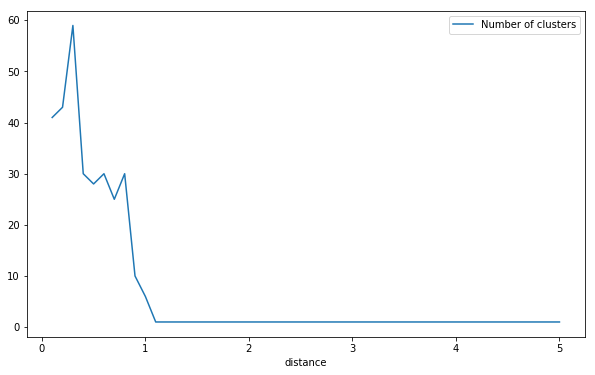

In [12]:
# Plotting the values obtained
results = pd.DataFrame([A,B,C]).T
results.columns = ['distance','Number of clusters','Number of outliers']
results.plot(x='distance',y='Number of clusters',figsize=(10,6))

* the optimal value of eps is around 1.2

In [25]:
# creating the DBSCAN model
model = DBSCAN(eps = 1.2,min_samples = 10).fit(df_standard)

In [26]:
print(model)

DBSCAN(algorithm='auto', eps=1.2, leaf_size=30, metric='euclidean',
    metric_params=None, min_samples=10, n_jobs=1, p=None)


### outlier values are marked with a label -1 hence the labels along with their count is printed with counter() method and those records marked with a label -1 are printed

In [27]:


outlier_df = pd.DataFrame(df_standard)
#print(outlier_df)
labels = model.labels_
print(Counter(model.labels_))

print(outlier_df[model.labels_ == -1])

Counter({0: 9910, -1: 86})
         price   bedrooms  bathrooms  sqft_living     grade
161  -0.582781  10.291270  -0.451610     0.122772 -0.533092
457   0.361971   7.089608   0.566882     1.959198  0.365826
736   0.204512  -2.515378  -0.791107    -0.146259  1.264744
793   5.066046   0.686284   1.924870     4.052959  3.961497
878   1.700369   0.686284   2.943362     4.310292  3.062579
1005  1.684032   2.820725   1.585373     1.304167  2.163661
1174  4.633035   2.820725   0.227384     3.374534  2.163661
1219  0.824505   0.686284   2.603865    -0.555653 -0.533092
1248  4.219706   1.753505   3.282859     4.731384  3.062579
1518  2.369568   1.753505   0.227384     2.684411 -0.533092
1537  3.286764   0.686284   3.282859     1.292470  2.163661
1584  4.081930   0.686284   3.282859     4.380474  1.264744
1623  3.235590   0.686284   4.301351     4.778172  3.062579
1719  0.572572   2.820725   4.301351     1.842228 -0.533092
1867  4.648781   1.753505   2.943362     3.280958  2.163661
1881  7.42792

Text(0.5,1,'DBSCAN for outlier detection')

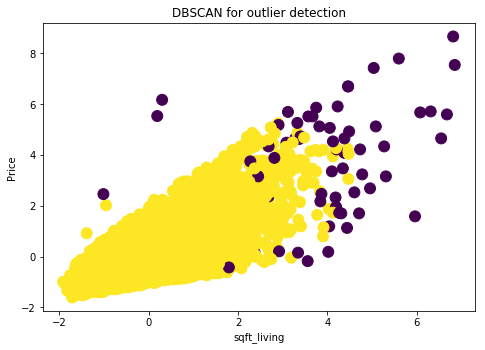

In [28]:
fig = plt.figure()

ax = fig.add_axes([.1,.1,1,1])

colors = model.labels_

ax.scatter(df_standard['sqft_living'],df_standard['price'],c = colors,s= 120)

ax.set_xlabel('sqft_living')

ax.set_ylabel('Price')

plt.title('DBSCAN for outlier detection')

Text(0.5,1,'DBSCAN for outlier detection')

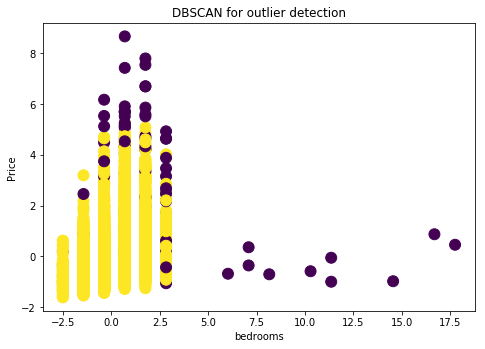

In [29]:
fig = plt.figure()

ax = fig.add_axes([.1,.1,1,1])

colors = model.labels_

ax.scatter(df_standard['bedrooms'],df_standard['price'],c = colors,s= 120)

ax.set_xlabel('bedrooms')

ax.set_ylabel('Price')

plt.title('DBSCAN for outlier detection')

Text(0.5,1,'DBSCAN for outlier detection')

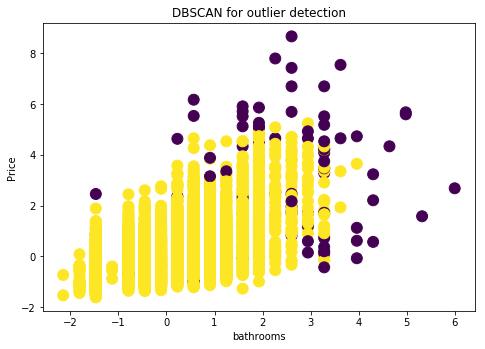

In [30]:
fig = plt.figure()

ax = fig.add_axes([.1,.1,1,1])

colors = model.labels_

ax.scatter(df_standard['bathrooms'],df_standard['price'],c = colors,s= 120)

ax.set_xlabel('bathrooms')

ax.set_ylabel('Price')

plt.title('DBSCAN for outlier detection')

Text(0.5,1,'DBSCAN for outlier detection')

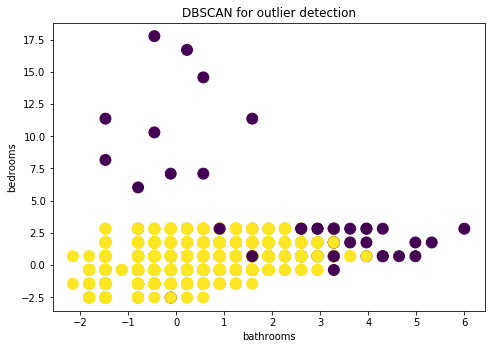

In [31]:
fig = plt.figure()

ax = fig.add_axes([.1,.1,1,1])

colors = model.labels_

ax.scatter(df_standard['bathrooms'],df_standard['bedrooms'],c = colors,s= 120)

ax.set_xlabel('bathrooms')

ax.set_ylabel('bedrooms')

plt.title('DBSCAN for outlier detection')

Text(0.5,1,'DBSCAN for outlier detection')

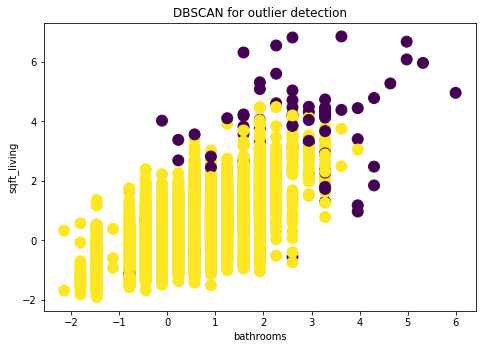

In [32]:
fig = plt.figure()

ax = fig.add_axes([.1,.1,1,1])

colors = model.labels_

ax.scatter(df_standard['bathrooms'],df_standard['sqft_living'],c = colors,s= 120)

ax.set_xlabel('bathrooms')

ax.set_ylabel('sqft_living')

plt.title('DBSCAN for outlier detection')

Text(0.5,1,'DBSCAN for outlier detection')

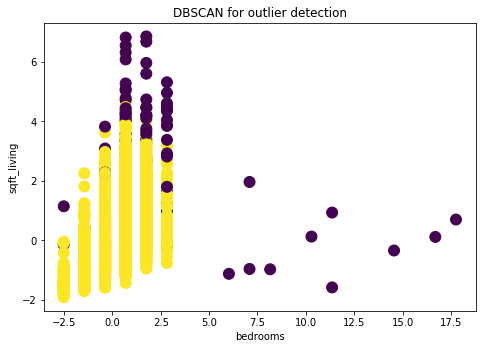

In [33]:
fig = plt.figure()

ax = fig.add_axes([.1,.1,1,1])

colors = model.labels_

ax.scatter(df_standard['bedrooms'],df_standard['sqft_living'],c = colors,s= 120)

ax.set_xlabel('bedrooms')

ax.set_ylabel('sqft_living')

plt.title('DBSCAN for outlier detection')

In [41]:
prop_out = prop_out.join(pd.DataFrame(labels))
prop_out = prop_out.rename(columns={0:'Cluster'})

In [43]:
prop_out[prop_out['Cluster']  == -1]

,price,bedrooms,bathrooms,sqft_living,grade,Cluster
161,3.500000e+05,13,1.75,2130,7,-1
457,5.900000e+05,10,2.50,3700,8,-1
736,5.500000e+05,1,1.50,1900,9,-1
793,1.785000e+06,4,3.50,5490,12,-1
878,9.300000e+05,4,4.25,5710,11,-1
1005,9.258500e+05,6,3.25,3140,10,-1
1174,1.675000e+06,6,2.25,4910,10,-1
1219,7.075000e+05,4,4.00,1550,7,-1
1248,1.570000e+06,5,4.50,6070,11,-1
1518,1.100000e+06,5,2.25,4320,7,-1


In [44]:
prop = prop.join(pd.DataFrame(labels))
prop = prop.rename(columns={0:'Cluster'})

In [45]:
prop[prop['Cluster']  == -1]

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,Cluster
161,1214000050,20141020T000000,3.500000e+05,13,1.75,2130,7500,1.0,0,0,4,7,1090,1040,1956,0,98166,47.4593,-122.343,-1
457,1951800580,20141024T000000,5.900000e+05,10,2.50,3700,12500,1.0,0,0,5,8,1920,1780,1973,0,98006,47.5403,-122.168,-1
736,5561401530,20141029T000000,5.500000e+05,1,1.50,1900,40600,1.5,0,0,5,9,1450,450,1977,0,98027,47.4718,-122.009,-1
793,4139420640,20141030T000000,1.785000e+06,4,3.50,5490,14300,1.0,0,4,3,12,2910,2580,1996,0,98006,47.5511,-122.114,-1
878,2025770560,20141103T000000,9.300000e+05,4,4.25,5710,24663,2.0,0,0,3,11,5710,0,2007,0,98092,47.3065,-122.158,-1
1005,2597531020,20141104T000000,9.258500e+05,6,3.25,3140,14923,2.0,0,0,3,10,3140,0,1991,0,98006,47.5411,-122.133,-1
1174,1959701745,20141107T000000,1.675000e+06,6,2.25,4910,6600,2.5,0,0,5,10,3580,1330,1910,0,98102,47.6458,-122.320,-1
1219,1175000280,20141107T000000,7.075000e+05,4,4.00,1550,6596,1.5,0,0,5,7,1550,0,1907,0,98107,47.6711,-122.398,-1
1248,7237500390,20141110T000000,1.570000e+06,5,4.50,6070,14731,2.0,0,0,3,11,6070,0,2004,0,98059,47.5306,-122.134,-1
1518,5430300120,20141113T000000,1.100000e+06,5,2.25,4320,7620,2.0,0,0,3,7,2880,1440,1973,2014,98115,47.6824,-122.287,-1


In [46]:
prop_index = prop[prop['Cluster']  == -1].index

In [47]:
for i in prop_index:
    prop = prop.drop(i,axis = 0)

In [48]:
prop.shape

(9910, 20)

In [51]:
 prop=prop.drop(['Cluster'], axis=1) 

In [52]:
prop.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long
0,5437400630,20141016T000000,625000.0,4,2.25,1920,8259,2.0,0,0,4,8,1920,0,1979,0,98027,47.5616,-122.088
1,3999300290,20141016T000000,850000.0,3,3.50,2620,11148,2.0,0,4,4,9,2060,560,1977,0,98008,47.5845,-122.115
2,2525059134,20141016T000000,500000.0,2,1.50,1760,12000,1.0,0,0,4,7,1760,0,1964,0,98052,47.6288,-122.109
3,1862400285,20141016T000000,375000.0,3,1.00,1200,5404,1.0,0,0,3,6,1200,0,1937,0,98117,47.6969,-122.368
4,7199320190,20141016T000000,618000.0,4,2.25,2470,7350,1.0,0,0,3,7,1600,870,1978,0,98052,47.6936,-122.128


In [53]:
#This dataframe is saved as a csv file with utf-8 encoding 
prop.to_csv('dataset4_solution.csv', index = False,encoding = 'utf-8')

### Reference

    * https://www.kaggle.com/tejasrinivas/chocolate-ratings-outlier-analysis-with-dbscan/code
    * https://www.youtube.com/watch?v=SSFd6UHjxII 